Amirhossein Safari_97463137_Tamrin #3 

In [57]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [58]:
url ="train.csv"
df_train = pd.read_csv(url)
print(df_train.head())

url ="test.csv"
df_test= pd.read_csv(url)

url ="comparision.csv"
df_compare= pd.read_csv(url)
print(df_compare.head())

   <DTYYYYMMDD>  <HIGH>  <TARGET>
0      20090609    1002      1031
1      20090610    1031      1025
2      20090613    1025      1026
3      20090614    1026      1026
4      20090615    1026      1026
   <TARGET>
0      2039
1      1948
2      2000
3      2060
4      2048


In [60]:
#Set Target Variable to Dataframe
output_var_train = pd.DataFrame(df_train["<TARGET>"])
compare_var_train = pd.DataFrame(df_compare["<TARGET>"])

#Selecting the Features to normalize
features = ["<DTYYYYMMDD>", "<HIGH>"]

#Scaling (Normaliazation)
scaler = MinMaxScaler()
feature_transform_train = scaler.fit_transform(df_train[features])
feature_transform_train= pd.DataFrame(columns=features, data=feature_transform_train, index=df_train.index)

feature_transform_test = scaler.fit_transform(df_test[features])
feature_transform_test = pd.DataFrame(columns=features, data=feature_transform_test, index=df_test.index)

print(feature_transform_test)

     <DTYYYYMMDD>    <HIGH>
0        0.000000  0.371186
1        0.004910  0.338136
2        0.006547  0.261017
3        0.008183  0.305085
4        0.009820  0.355932
..            ...       ...
121      0.990180  0.004237
122      0.991817  0.002542
123      0.996727  0.038136
124      0.998363  0.000000
125      1.000000  0.036441

[126 rows x 2 columns]


In [56]:
#initial
X_train = feature_transform_train
y_train = output_var_train.values.ravel()
compare_train = compare_var_train.values.ravel() 

#Process the data for LSTM 
trainX = np.array(X_train)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])

In [61]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation="relu", return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error", optimizer="adam")

print(lstm)


In [ ]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=500, batch_size=8, verbose=1, shuffle=False)

Epoch 1/500
288/288 [==============================] - 2s 2ms/step - loss: 2155828.0000
Epoch 2/500
288/288 [==============================] - 1s 2ms/step - loss: 2140392.5000
Epoch 3/500
288/288 [==============================] - 1s 2ms/step - loss: 2110551.0000
Epoch 4/500
288/288 [==============================] - 1s 2ms/step - loss: 2065491.0000
Epoch 5/500
288/288 [==============================] - 0s 2ms/step - loss: 2007891.0000
Epoch 6/500
288/288 [==============================] - 1s 2ms/step - loss: 1940941.2500
Epoch 7/500
288/288 [==============================] - 1s 2ms/step - loss: 1867255.1250
Epoch 8/500
288/288 [==============================] - 1s 2ms/step - loss: 1788829.1250
Epoch 9/500
288/288 [==============================] - 1s 2ms/step - loss: 1707224.5000
Epoch 10/500
288/288 [==============================] - 1s 2ms/step - loss: 1623713.2500
Epoch 11/500
288/288 [==============================] - 1s 2ms/step - loss: 1539375.3750
Epoch 12/500
288/288 [========

In [37]:
lstm.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


In [62]:
X_test=feature_transform_test
testX =np.array(X_test)
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

#LSTM Prediction
y_pred= lstm.predict(X_test)

for i in range(0,len(X_test)):
    df_test.loc[i, 'Target'] = round(float(y_pred[i]),3)

df_test.to_csv("test_result.csv", index=False)

In [64]:
#MSE
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(compare_train, y_pred)
print(MSE)

4604707.738086413


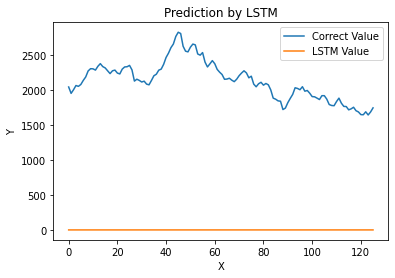

In [68]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(compare_train, label="Correct Value")
plt.plot(y_pred, label="LSTM Value")
plt.title("Prediction by LSTM")
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig('lstm.png')
plt.legend()
plt.show()
